Importing the Dependencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


Data Collection and Analysis



In [ ]:
# loading the dataset from csv file to pandas dataset
big_mart_data=pd.read_csv('/content/Test-Set.csv')

In [ ]:
# print first five rows of datafram
big_mart_data.head()


,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
# number of data points and number of features
big_mart_data.shape

(5681, 11)

In [ ]:
# getting some informations about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          5681 non-null   object 
 1   Weight             4705 non-null   float64
 2   FatContent         5681 non-null   object 
 3   ProductVisibility  5681 non-null   float64
 4   ProductType        5681 non-null   object 
 5   MRP                5681 non-null   float64
 6   OutletID           5681 non-null   object 
 7   EstablishmentYear  5681 non-null   int64  
 8   OutletSize         4075 non-null   object 
 9   LocationType       5681 non-null   object 
 10  OutletType         5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Categorical Features:
- ProductID
- Fat_content
- Product_type
- OutletID  
- OutletSize      
- LocationType
- OutletType  


In [ ]:
# checking for missing values
big_mart_data.isnull().sum()

ProductID               0
Weight                976
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1606
LocationType            0
OutletType              0
dtype: int64

Handling Missing Values


mean --> average value

mode -->frequent values

In [ ]:
# mean values of "Weight" Columns
big_mart_data['Weight'].mean()

12.695633368756642

In [ ]:
# filling the missing values in weight coloumn with mean value
big_mart_data['Weight'].fillna(big_mart_data['Weight'].mean(),inplace=True)



In [ ]:
# find the missing values in the dataset
big_mart_data.isnull().sum()

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1606
LocationType            0
OutletType              0
dtype: int64

Replacing the missing values in outlet size coloumn with mode



In [ ]:
mode_of_outlet_size=big_mart_data.pivot_table(values='OutletSize', columns='OutletType',aggfunc=(lambda x:x.mode()[0]))

In [ ]:
print(mode_of_outlet_size)

OutletType Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
OutletSize         Small             Small            Medium            Medium


In [ ]:
missing_values=big_mart_data['OutletSize'].isnull()

In [ ]:
print(missing_values)

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: OutletSize, Length: 5681, dtype: bool


In [ ]:
big_mart_data.loc[missing_values,'OutletSize'] = big_mart_data.loc[missing_values,'OutletType'].apply(lambda x : mode_of_outlet_size)

In [ ]:
big_mart_data.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
dtype: int64

Data Analysis


In [ ]:
# Statistcial Measures about the data
big_mart_data.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Numerical features


In [ ]:
sns.set()

<ipython-input-18-97eeba7aebab>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Weight'])


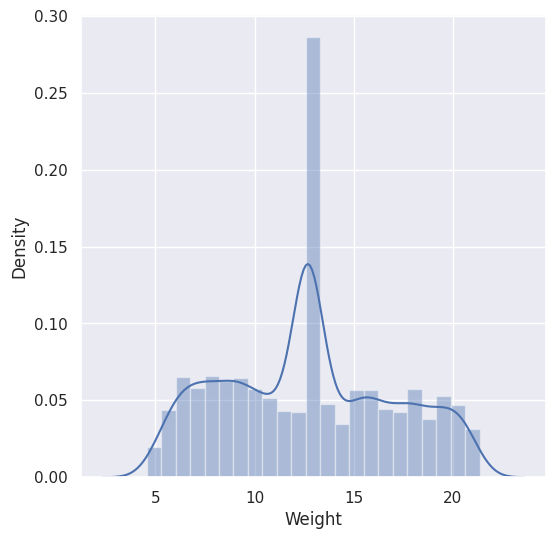

In [ ]:
# weight Distribution
plt.figure(figsize= (6,6))
sns.distplot(big_mart_data['Weight'])
plt.show()


<ipython-input-19-79cf1f9b7f0d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['ProductVisibility'])


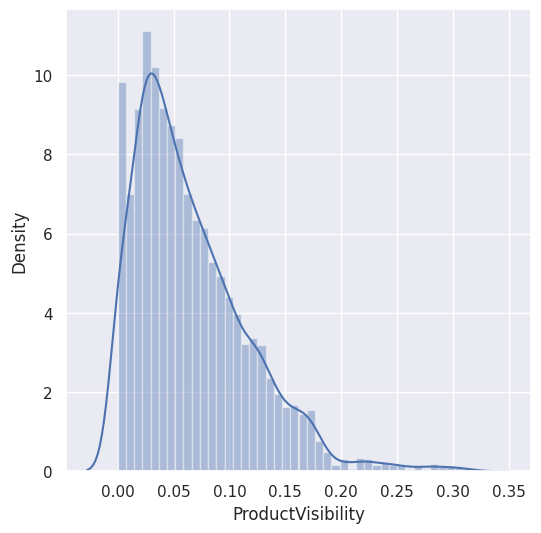

In [ ]:
# ProductVisibility Distribution
plt.figure(figsize= (6,6))
sns.distplot(big_mart_data['ProductVisibility'])
plt.show()


<ipython-input-20-27422a5c05e6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['MRP'])


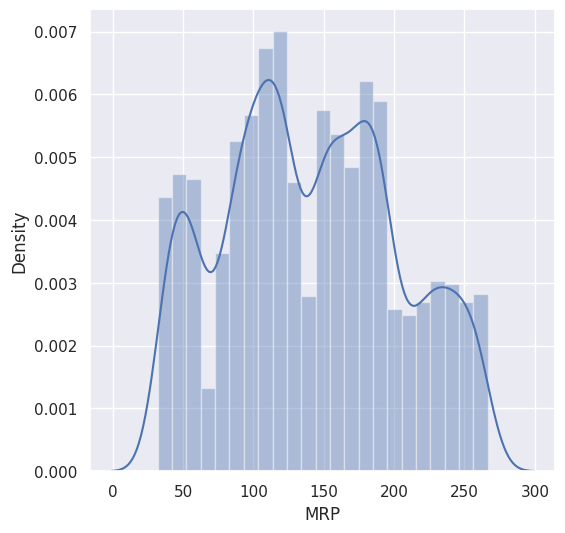

In [ ]:
# MRP Distribution
plt.figure(figsize= (6,6))
sns.distplot(big_mart_data['MRP'])
plt.show()


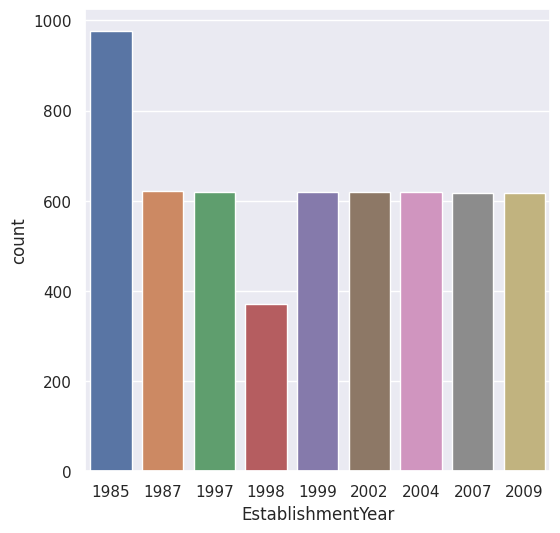

In [ ]:
# EstablishmentYear Count
plt.figure(figsize= (6,6))
sns.countplot(x='EstablishmentYear', data =big_mart_data)
plt.show()


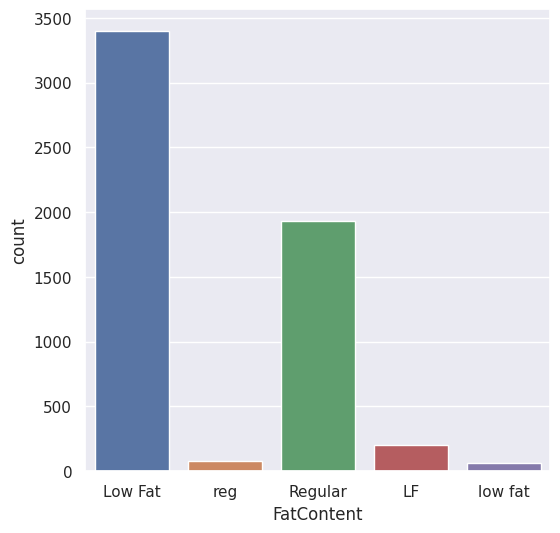

In [ ]:
#Fat_content column
plt.figure(figsize=(6,6))
sns.countplot(x='FatContent', data=big_mart_data)
plt.show()

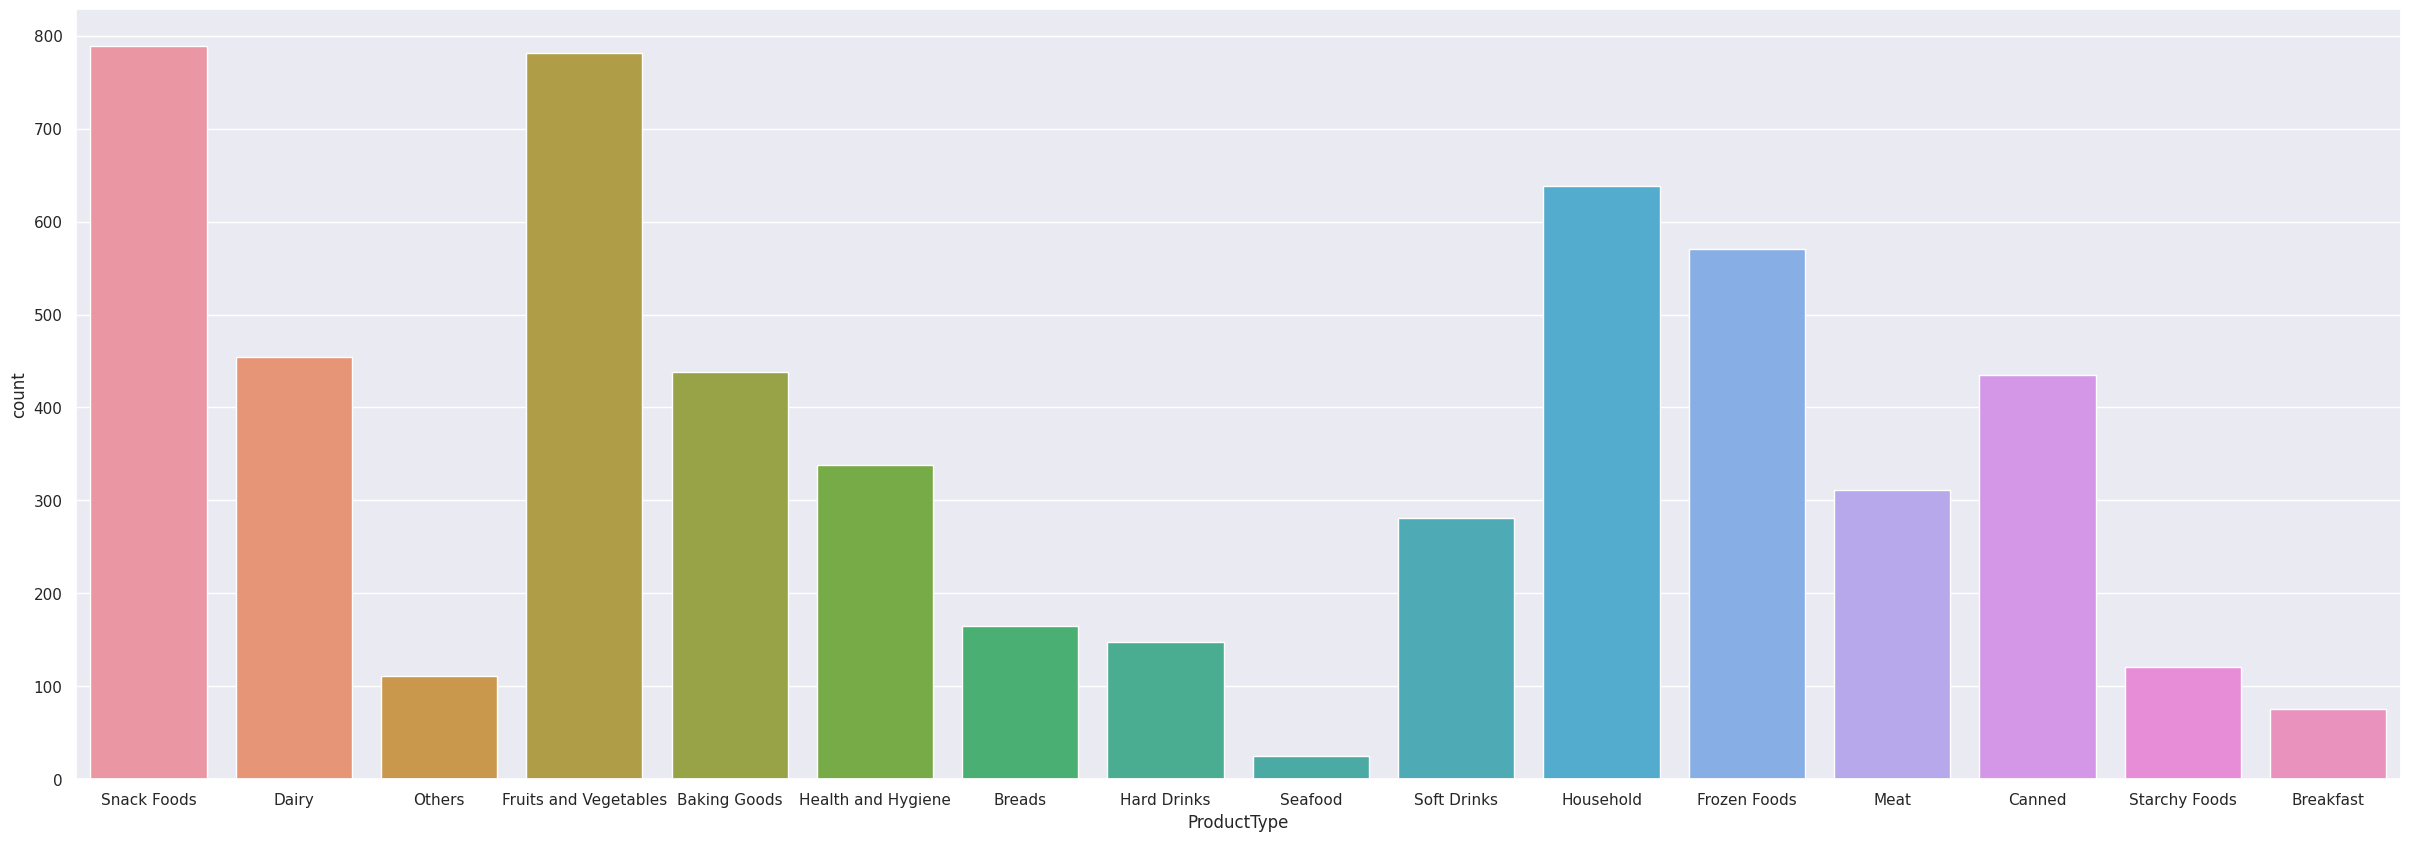

In [ ]:
# Product_type column
plt.figure(figsize=(30,10))
sns.countplot(x='ProductType', data=big_mart_data)
plt.show()

In [ ]:
# OutletSize column
plt.figure(figsize=(6, 6))
sns.countplot(x='OutletSize', data=big_mart_data, order=['Small', 'Medium', 'Large'])
plt.show()


TypeError: ignored

<Figure size 600x600 with 0 Axes>

Data Preprocessing

In [ ]:
big_mart_data.head()

In [ ]:
big_mart_data['FatContent'].value_counts()

In [ ]:
big_mart_data.replace({'FatContent':{'Low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [ ]:
big_mart_data['FatContent'].value_counts()

Label Encoding

In [ ]:
encoder =  LabelEncoder()

In [ ]:
big_mart_data['ProductID'] = encoder.fit_transform(big_mart_data['ProductID'])

big_mart_data['FatContent'] = encoder.fit_transform(big_mart_data['FatContent'])

big_mart_data['ProductType'] = encoder.fit_transform(big_mart_data['ProductType'])

big_mart_data['ProductID'] = encoder.fit_transform(big_mart_data['ProductID'])

big_mart_data['ProductID'] = encoder.fit_transform(big_mart_data['ProductID'])

big_mart_data['ProductID'] = encoder.fit_transform(big_mart_data['ProductID'])

big_mart_data['ProductID'] = encoder.fit_transform(big_mart_data['ProductID'])